# Python Średniozaawansowany

#### Instrukcja instalacji VS Code <a class="anchor" id="install"></a>

 - Zainstaluj narzędzia [Python](https://www.python.org/downloads/).

 - Pobierz [VS Code](https://code.visualstudio.com/).

 - Zainstaluj rozszerzenie [Python](https://marketplace.visualstudio.com/items?itemName=ms-python.python).

 - Zainstaluj rozszerzenie [Jupyter](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter).

  - Zainstaluj rozszerzenie [Git Extension Pack](https://marketplace.visualstudio.com/items?itemName=donjayamanne.git-extension-pack).

#### Potrzebne importy

 - [matplotlib](https://matplotlib.org/) - wymagana instalacja
    * [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
 - [numpy](https://numpy.org/) - wymagana instalacja
 - [pandas](https://pandas.pydata.org/) - wymagana instalacja
 - os
 - [inspect](https://docs.python.org/3/library/inspect.html) - biblioteka zawierająca [funkcjonalność przydatną przy analizowaniu struktur klas](https://docs.python.org/3/library/inspect.html#classes-and-functions).
 - [abc](https://docs.python.org/3/library/abc.html) - biblioteka do abstrakcji klasowej


In [1]:
from abc import ABC, abstractmethod
import traceback
import os
from inspect import getmro
from IPython.display import clear_output
from IPython.core.magic import register_line_magic, register_cell_magic
from IPython import get_ipython

In [2]:
%pip install matplotlib
%pip install numpy
%pip install pandas
clear_output()

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#### Przydatne definicje [magicznych komend](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

 * `%%captureErrors` - przechwytuje wszelkie błędy występujące w komórce i drukuje je jako zwykły tekst. Kolorowanie wzorowane na [wątku](https://stackoverflow.com/questions/61139640/is-it-possible-to-print-traceback-format-exc-in-color-using-colored-tracebac) ze StackOverFlow.

In [3]:
import traceback
from pygments import formatters, highlight, lexers

@register_cell_magic('captureErrors')
def captureErrors(line, cell):
    try:
        exec(cell)
    except:
        tb_text = "".join(traceback.format_exc())

        lexer = lexers.get_lexer_by_name("pytb", stripall=True)
        formatter = formatters.get_formatter_by_name("terminal256")
        tb_colored = highlight(tb_text, lexer, formatter)

        print(tb_colored)


## Wyjątki

### Problem:

W przypadku źle napisanego kodu, nieoczekiwanych przypadków brzegowych lub awarii systemu, program może natrafić na osobliwość, która uniemożliwia dalsze działanie i wymaga albo przerwanie wykonania, albo naprawienie stanu w trakcie wykonania. W jaki sposób przekazać informację o błędzie oraz w jaki sposób obsłużyć taki błąd?

### [Wyjątki](https://en.wikipedia.org/wiki/Exception_handling) są zdarzeniami, które pojawiają się podczas wykonania programu i przerywają jego normalny przebieg. Technicznie są to obiekty reprezentujące dany błąd.

In [4]:
%%captureErrors
a = 5
b = 0
print(a/b)

Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 3, in <module>
ZeroDivisionError: division by zero



##### Wszystkie wbudowane, nie opuszczające systemu [wyjątki](https://docs.python.org/3/library/exceptions.html) dziedziczą po klasie `Exception`. Wyjątki tworzone przez programistę również powinny dziedziczyć po tej klasie.

##### Najczęściej spotykane wyjątki to

 - `AssertionError` - niespełnienie warunku operacji [assert](https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement)
 - `AttributeError` - odwołanie do nieistniejącego atrybutu
 - `IOError` - błąd operacji wejścia/wyjścia
 - `IndexError` - odwołanie do kolekcji za pomocą indeksu poza zakresem
 - `ImportError` - problem z załadowaniem modułu
 - `KeyError` - odwołanie do słownika nieistniejącym kluczem
 - `ValueError` - przekazanie do funkcji argumentu o niepoprawnej wartości
 - `ZeroDivisionError` - dzielenie przez zero

### Obsługa wyjątków

##### Wyjątki obsługujemy za pomocą słów kluczowych:
 - `try` - poprzedza obszar sprawdzany pod kątem wyrzucania wyjątków,
 - `except` - poprzedza obszar obsługi wyłapanego wyjątku,
 - `finally` - poprzedza obszar, który jest wykonywany pod koniec obsługi, niezależnie od tego, czy wyjątek został wyrzucony czy też nie
 - `raise` - wyrzuca zadany wyjątek

In [5]:
for i in [0.5, 0.3, 0]:
    result = 0
    try:
        if i == 0:
            result = 10000000
        else:
            result = 10/i
    except:
        result = 10000000
    print(i, " ", result)

0.5   20.0
0.3   33.333333333333336
0   10000000


In [6]:
def root4(x):
    return x ** 0.25

x = "Some dummy text"

try:
    print(root4(x))
except:
    print("Hey! I cannot take a root of that")

Hey! I cannot take a root of that


In [7]:
%%captureErrors
for i in [0.5, 0.3, 0.001]:
    result = 0
    try:
        result = 10/(max(0.1,i) - 0.1)
    except:
        result = 10000000
        raise ValueError("Value lower than 0.1")
    finally:
        print(i, " ", result)


0.5   25.0
0.3   50.00000000000001
0.001   10000000
Traceback (most recent call last):
  File "<string>", line 4, in <module>
ZeroDivisionError: float division by zero

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 7, in <module>
ValueError: Value lower than 0.1



##### Do każdego bloku `try` możemy przypisać wiele bloków `except`.

In [8]:
l = [5, 0, 6, 2]

for i in range(5):
    try:
        a = 1/l[i]
        print(a)
        assert a >= 0.2
    except KeyError:
        print("Wrong key")
    except (ZeroDivisionError):
        print("Oopsie, whoopsie. You tried to divide by zero")
    except (IndexError, KeyError):
        print("I went too far")
    except:
        print("What did just happened here?")

0.2
Oopsie, whoopsie. You tried to divide by zero
0.16666666666666666
What did just happened here?
0.5
I went too far


##### Klauzulę `finally` zazwyczaj używamy, gdy po wykonaniu zadania musimy zwolnić pewne zasoby, niezależnie, czy procedura powiodła się czy nie. Na przykład, obsługa pliku.

In [9]:
%%captureErrors
dummy_file_name = "dummy.file"

try:
    file = open(dummy_file_name, "r")
    print(file.read())
except:
    print("File is not readable")
finally:
    file.close()
    if os.path.exists(dummy_file_name):
        os.remove(dummy_file_name)


File is not readable
Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 9, in <module>
NameError: name 'file' is not defined



### Manager kontekstu

##### Zamiast tego możemy użyć wyrażenia [with](https://docs.python.org/3/reference/compound_stmts.html#the-with-statement) zwanego managerem kontekstu, które obsługuje obiekty posiadające metody `__enter__` i `__exit__`

In [10]:
%%captureErrors

dummy_file_name = "dummy.file"

with open(dummy_file_name, "w") as file:
    file.write("Somedummytextjusttofillthefilewithsomecontent")

if os.path.exists(dummy_file_name):
    os.remove(dummy_file_name)

with open(dummy_file_name, "r") as file:
    print(file.read())

Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 10, in <module>
FileNotFoundError: [Errno 2] No such file or directory: 'dummy.file'



Podobną funkcjonalność można osiągnąć również z pomocą dekoratora [@contextmanager](https://docs.python.org/3/library/contextlib.html#contextlib.contextmanager)

In [11]:
%%captureErrors

from contextlib import contextmanager

dummy_file_name = "dummy.file"

class ReadWriteFile:
    def __init__(self, address) -> None:
        self.writer = open(address, "w")
        self.reader = open(address, "r")

    def write(self, text):
        self.writer.write(text)

    def read(self):
        return self.reader.read()

@contextmanager
def autodestructingFile(address):
    file = ReadWriteFile(address)
    try:
        yield file
    finally:
        file.reader.close()
        file.writer.close()
        if os.path.exists(address):
            os.remove(address)


with autodestructingFile(dummy_file_name) as file:
    file.write("somedummytext")
    print(file.read())

    raise Exception("some dummy exception")
    print("message ignored")

Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 29, in <module>
  File "c:\Users\micha\AppData\Local\R-MINI~1\envs\pyML\lib\contextlib.py", line 117, in __enter__
    return next(self.gen)
  File "<string>", line 19, in autodestructingFile
NameError: name 'ReadWriteFile' is not defined



### [Rzucanie wyjątków](https://docs.python.org/3/tutorial/errors.html#raising-exceptions)

##### W celu rzucenia wyjątku wykorzystujemy wyrażenie `raise`.

In [12]:
%%captureErrors
raise Exception("My dummy exception")

Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 1, in <module>
Exception: My dummy exception



### Tworzenie własnych wyjątków

In [13]:
class CustomException1(Exception):
    pass

try:
    raise CustomException1("Some custom exception")
except:
    traceback.print_exc()

class CustomException2(Exception):
    def __init__(self) -> None:
        super().__init__("My hardcoded message")

    def sing(self):
        print("In the marry month of June")

try:
    raise CustomException2()
except CustomException2 as e:
    traceback.print_exc()
    e.sing()

In the marry month of June


Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/2871786223.py", line 5, in <module>
    raise CustomException1("Some custom exception")
CustomException1: Some custom exception
Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/2871786223.py", line 17, in <module>
    raise CustomException2()
CustomException2: My hardcoded message


###### <font color='red'>Uwaga, niektóre wyjątki zabijają jądro Jupyter. Poniższy przykład ma na celu wywołania jednego z takich wyjątków. Po śmierci jądra cały kontekst wywołania zostanie stracony i wszelkie zmienne i importy będą musiały zostać wprowadzone na nowo.</font>

Dla jakiego `n` poniższy kod może nigdy się nie zakończyć? Czemu? Czemu jednak się kończy? Jakim błędem się kończy? (wywołaj poza środowiskiem `.ipynb` żeby uzyskać treść błędu) Co to znaczy?

In [14]:
def fact(n):
    if n == 0:
        return 1
    else:
        return fact(n - 1) * n


 1. <font size="1" color="gray">Dowolna liczba nie będąca liczbą naturalną</font>
 2. <font size="1" color="gray">Funkcja będzie wywoływała siebie samą w nieskończoność. To tak zwana [rekurencja](https://en.wikipedia.org/wiki/Recursion).</font>
 3. <font size="1" color="gray">Python przerywa samodzielnie zbyt głęboko schodzące rekursje.</font>
 4. <font size="1" color="gray">Przekroczono dopuszczalną głębokość rekurencji. Przerywa to program zanim zostanie wyrzucony systemowy błąd `stackoverflow`.</font>



## [Programowanie obiektowe](https://en.wikipedia.org/wiki/Object-oriented_programming)

### Problem:

Program da się zazwyczaj podzielić na małe bloczki, które komunikują się ze sobą nawzajem. Często bloczki te są powtarzalne i da się je zdefiniować wspólnie jedną definicją. W jaki sposób stworzyć strukturę hierarchii i zależności? W jaki sposób przygotować możliwość zastąpienia niektórych dotychczasowych bloczków przez nowe warianty? W jaki sposób uogólnić formułę bloczku tak, by zdefiniować bazę wielu bloczków na raz? W jaki sposób napisać kod, w którym widoczne jest to, co bloczek wykorzystuje na własną potrzebę a co może być wykorzystywane przez inne bloczki?

##### Podstawowe koncepcje to

 - [dziedziczenie](https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)),
 - [kompozycja](https://en.wikipedia.org/wiki/Object_composition),
 - [abstrakcja](https://en.wikipedia.org/wiki/Abstraction_(computer_science)),
 - [hermetyzacja](https://en.wikipedia.org/wiki/Encapsulation_(computer_programming)),
 - [polimorfizm](https://en.wikipedia.org/wiki/Polymorphism_(computer_science)).

### Dziedziczenie

Jeżeli pewna klasa posiada funkcjonalność, która jest nam potrzebna, ale chcielibyśmy jeszcze dodać coś od siebie, możemy rozszerzyć klasę tworząc nową, która dziedziczy funkcjonalności klasy bazowej.

In [15]:
class Animal:
    def __init__(self, name) -> None:
        self.name = name

    def eat(self, food):
        print(self.name, ":Nom, nom, nom. Tasty", food)

class Bird(Animal):
    def fly(self):
        print(self.name, ": I can fly")

animal = Animal("Creature")
animal.eat("other animal")

bird = Bird("Tweety")
bird.eat("grain")
bird.fly()

def feed(animal: Bird, food: object) -> None:
    animal.eat(food)
    animal.fly()

feed(bird, "grain")

Creature :Nom, nom, nom. Tasty other animal
Tweety :Nom, nom, nom. Tasty grain
Tweety : I can fly
Tweety :Nom, nom, nom. Tasty grain
Tweety : I can fly


Możemy sprawdzić pochodzenie naszej klasy za pomocą funkcji [getmro](https://docs.python.org/3/library/inspect.html#inspect.getmro) z pakietu `inspect`.

In [16]:
print(getmro(type(bird)))
print(getmro(type(getmro)))
print(getmro(AttributeError))
print(getmro(type(5.0)))

(<class '__main__.Bird'>, <class '__main__.Animal'>, <class 'object'>)
(<class 'function'>, <class 'object'>)
(<class 'AttributeError'>, <class 'Exception'>, <class 'BaseException'>, <class 'object'>)
(<class 'float'>, <class 'object'>)


Możemy też dziedziczyć po wielu klasach przejmując atrybuty każdej z nich.

In [17]:
class Animal:
    def __init__(self, name) -> None:
        self.name = name
        print("I am an animal")

    def eat(self, food):
        print(self.name, ": Nom, nom, nom. Tasty", food)

class Oviparous(Animal):
    def __init__(self, name) -> None:
        super().__init__(name)
        print("I am an oviparous")

    def bearEgg(self):
        print(self.name, ": plop")

    def breath(self):
        print(self.name, ": wheez")

class Mammal(Animal):
    def __init__(self, name) -> None:
        super().__init__(name)
        print("I am a mammal")

    def giveMilk(self):
        print(self.name, ": blurp")

    def breath(self):
        print(self.name, ": phew")

class Platypus(Mammal, Oviparous):
    def __init__(self, name) -> None:
        super().__init__(name)
        print("I am a platypus")

    def sting(self):
        print(self.name, ": sting")

perry = Platypus("Perry")

perry.bearEgg()
perry.giveMilk()
perry.eat("algae")
perry.breath()

print(getmro(Platypus))

I am an animal
I am an oviparous
I am a mammal
I am a platypus
Perry : plop
Perry : blurp
Perry : Nom, nom, nom. Tasty algae
Perry : phew
(<class '__main__.Platypus'>, <class '__main__.Mammal'>, <class '__main__.Oviparous'>, <class '__main__.Animal'>, <class 'object'>)


Zauważmy, że powyższa klasa rozwiązuje dziedziczenie wpierw rozpatrując klasę `Mammal`. Oznacza to, że jeśli klasy `Mammal` i `Oviparous` będą miały takie samo pole, `Platypus` przejmie tylko pole od `Mammal`.

### Kompozycja

Zamiast dziedziczyć wszystkie atrybuty możemy wkomponować jedną klasę w drugą tworząc obiekt tej pierwszej jako pole drugiej. Następnie pole to możemy wykorzystać do implementacja własnych metod.

In [18]:
from __future__ import annotations

class Hero():
    def __init__(self, name: str) -> None:
        self.name = name

    def introduce(self) -> str:
        return f"I am {self.name}"

class Mage(Hero):
    def __init__(self, name: str, staff: Staff) -> None:
        super().__init__(name)
        self.staff = staff

    def equipStaff(self, staff: Staff):
        self.staff = staff

    def castSpell(self) -> str:
        if self.staff:
            return self.staff.use()
        else:
            return None

class Staff:
    def use(self):
        pass

    def setOwner(self, mage: Mage) -> None:
        self.mage = mage

class FireWand(Staff):
    def use(self) -> str:
        return "Fireball!"

class FrostWand(Staff):
    def use(self) -> str:
        return "Brrr"

mage1 = Mage("Master", FireWand())
mage2 = Mage("Timothy", FrostWand())

print(mage1.introduce(), mage1.castSpell())
print(mage2.introduce(), mage2.castSpell())

I am Master Fireball!
I am Timothy Brrr


Zarówno Tymek jak i Mistrz potrafią czarować, potrzebują jednak do tego różdżek. Czarodziej nie musi wiedzieć, jak zostaje wykonany czar, potrzebuje tylko wiedzieć, jak korzystać z różdżki. W ten sposób rozdzielamy implementację obu klas i obiekt wkomponowany może być w dowolnym momencie zmieniony na nową implementację nie zmieniając implementacji klasy komponującej.

### Abstrakcja

Czasami chcemy stworzyć wzór klasy bez implementowania poszczególnych jej elementów. Przkładowo, chcę stworzyć klasę `Collection`, która pozwoli użytkownikowi na dostęp do elementów, ale pozwoli również zaimplementować różne kontenery przechowujące elementy.

Nie jest to podstawowy koncept w Pythonie ze względu na brak [silnej typizacji](https://en.wikipedia.org/wiki/Strong_and_weak_typing), stąd musimy wykorzystać do tego pakiet `abc`.

###### Python nie posiada silnej typizacji stąd koncept abstrakcji jest czystym formalizmem. W językach z silną typizacją zawsze musimy podać, jakiego typu dane przyjmuje funkcja. Jeżeli nie chcemy podawać gotowej implementacji od razu przy tworzeniu funkcji, możemy stworzyć klasę-wydmuszkę, która będzie tylko szablonem pod klasy obiektów przekazywanych do owej funkcji.

In [19]:
class Collection:
    def __init__(self, elements) -> None:
        pass

    def getNext(self):
        pass

c = Collection([1, 2, 4])
print(c.getNext())

class SingleElementCollection(Collection):
    def __init__(self, elements) -> None:
        super().__init__(elements)
        self.element = elements

    def getNext(self):
        return self.element

c = SingleElementCollection([1, 2, 4])

class LoopCollection(Collection):
    def __init__(self, elements) -> None:
        super().__init__(elements)
        self.elemnts = elements
        self.index = 0

    def getNext(self):
        element = self.elemnts[self.index]
        self.index = (self.index + 1) % len(self.elemnts)
        return element

c = LoopCollection([1, 2, 4])

def iterate(collection: Collection, n: int, f: function):
    for i in range(n):
        f(collection.getNext())

iterate(c, 10, print)

None
1
2
4
1
2
4
1
2
4
1


W powyższym kodzie klasa `Collection` jest w pełni poprawną klasą i można stworzyć jej obiekt. Klasa abstrakcyjna nie powinna dawać możliwości stworzenia swojej instancji. Jest to wyłącznie wydmuszka, która służy jako wzorzec do stworzenia poprawnej implementacji.

Żeby poinformować, że klasa ta jest wyłącznie wydmuszką stosujemy pakiet [abc](https://docs.python.org/3/library/abc.html). W kodzie poniżej klasa `Collection` dziedziczy po klasie `ABC` i posiada pola z dekoratorem [@abstractmethod](https://docs.python.org/3/library/abc.html#abc.abstractmethod). Z tego powodu nie można stworzyć instancji tej klasy a jedynie instancje klas dziedziczących, które implementują te pola.

In [20]:
class Collection(ABC):
    @abstractmethod
    def __init__(self, elements) -> None:
        pass

    @abstractmethod
    def getNext(self):
        pass

class SingleElement(Collection):
    def __init__(self, elements) -> None:
        self.element = elements

    def getNext(self):
        return self.element

class LoopCollection(Collection):
    def __init__(self, elements) -> None:
        self.elements = elements
        self.i = 0

    def getNext(self):
        element = self.elements[self.i]
        self.i %= len(self.elements)
        return element

c = LoopCollection([1, 2, 4])

def iterate(collection: Collection, n: int, f):
    for i in range(n):
        f(collection.getNext())

iterate(c, 10, print)

1
1
1
1
1
1
1
1
1
1


### Hermetyzacja

Niektóre pola nie powinny być dostępne z zewnątrz. Jeżeli nasza klasa wykonuje jakąś operację na własnych parametrach możemy chcieć chronić te parametry przed zmianą z zewnątrz lub przez klasy dziedziczące.

Pola [prywatne](https://en.wikipedia.org/wiki/Access_modifiers) są dostępne tylko dla klasy zawierającej owe pole. Klasy dziedziczące nie mają do tego pola dostępu. Podejście takie nazywamy hermetyzacją. Python nie posiada mechanizmu hermetyzacji i pola są zawsze dostępne. Jeżeli chcemy zaznaczyć, że pole jest zamierzone jako chronione zaczynamy jego nazwę od podkreślnika (`_`), jeżeli zaś chcemy, żeby było traktowane jako prywatne zaczynamy jego nazwę od podwójnego podkreślnika (`__`).

In [21]:
class ProtectedDummy:
    def __init__(self) -> None:
        self._counter = 0

    def add(self):
        self._counter += 1

    def getCounter(self):
        return self._counter

class ProtectedChild(ProtectedDummy):
    def add(self):
        self._counter += 3

dummy = ProtectedDummy()
dummy.add()
dummy.add()
dummy.add()
dummy._counter = -3
dummy.add()
dummy.add()
dummy.add()
dummy.getCounter()

0

Pola prywatne wciąż są osiągalne z zewnątrz jako pola o nazwie `_<CLASS_NAME><FIELD_NAME>`.

In [22]:
class PrivateDummy:
    def __init__(self) -> None:
        self.__private = 0

    def add(self):
        self.__private += 1

    def counter(self):
        return self.__private

dummy = PrivateDummy()
dir(dummy)

dummy.add()
dummy.add()
dummy.add()
dummy._PrivateDummy__private = -3
dummy.add()
dummy.add()
dummy.add()
print(dummy.counter())

0


### Polimorfizm

Python nie implementuje pełnego polimorfizmu. W językach silnie typowanych możemy zdefiniować dwie funkcje o tej samej nazwie, przyjmujące jednak parametry różnego typu.

In [23]:
def f(a: int):
    print("This is an integer")

def f(b: str):
    print("This is a string")

f(1)
f("somedummytext")

This is a string
This is a string


Python nie daje takiej możliwości i zostanie wywołana wyłącznie funkcja ostatnio zdefiniowana. Nie istnieje w nim również możliwość tworzenia funkcji o tej samej nazwie ale innej liczbie parametrów.

In [24]:
%%captureErrors
def f(a):
    print("I have got a single value")

def f(a, b):
    print("I have got two values")

f(1, 2)
f(3)

I have got two values
Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 8, in <module>
TypeError: f() missing 1 required positional argument: 'b'



Jedyne postacie polimorfizmu w Pythonie to funkcje wywołujące te same operacje na obiektach różnych typów, tak zwany [duck typing](https://en.wikipedia.org/wiki/Duck_typing).

In [25]:
%%captureErrors
class Duck:
    def swim(self):
        print("Duck swimming")

    def fly(self):
        print("Duck flying")

class Whale:
    def swim(self):
        print("Whale swimming")

for animal in [Duck(), Whale()]:
    animal.swim()
    animal.fly()

Duck swimming
Duck flying
Whale swimming
Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 14, in <module>
AttributeError: 'Whale' object has no attribute 'fly'



### [Dataclass](https://docs.python.org/3/library/dataclasses.html)

Aby nie pisać za każdym razem konstruktora (`__init__`), reprezentacji tekstowej (`__repr__`) oraz funkcjonalności porównania (`__eq__`) możemy użyć dekoratora `@dataclass`. Zapisujemy pola takiej klasy pisząc ich nazwy z typami po dwukropku.

Co typowe dla Pythona, zadane typy są wyłącznie informacyjne i nic nie stoi na przeszkodzie użyca innych typów.

In [26]:
from dataclasses import dataclass

@dataclass
class Dummy:
    a: int
    b: str
    c: list

dummy = Dummy(1, 2, 3)
dummy2 = Dummy(1, 2, 3)
print(dummy)
print(dummy == dummy2)
print(dummy.a, dummy.b, dummy.c)

Dummy(a=1, b=2, c=3)
True
1 2 3


Dektorator `@dataclass` udostępnia również możliwość tworzenie innej funkcjonalności:

 * operatory porównania (`<`, `>`, `<=` i `>=`)

In [27]:
@dataclass(order=True)
class Pair:
    a: int
    b: float

Pair(1, 2.0) < Pair(2, 1.0)

True

 * [hashowanie](https://en.wikipedia.org/wiki/Hash_function) bez gwarancji niezmienności

In [28]:
%%captureErrors
from dataclasses import field

@dataclass
class Nonhashable:
    l: int
    a: int
    b: int

@dataclass(unsafe_hash=True)
class Hashable:
    l: list = field(hash=False)
    a: int
    b: int

n = Nonhashable(0, 1, 2)
h = Hashable([1, 2, 3], 1, 2)
print(hash(h))
h.l = 3
print(hash(h))
{n}

Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 10, in <module>
  File "<string>", line 11, in Hashable
NameError: name 'field' is not defined



 * niemutowalność pól

In [29]:
%%captureErrors

@dataclass(frozen=True)
class FrozenClass:
    a: int
    b: float

f = FrozenClass(2, 4.5)
print(f)
print(f.a, f.b)
f.a = 4

FrozenClass(a=2, b=4.5)
2 4.5
Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 10, in <module>
  File "<string>", line 4, in __setattr__
dataclasses.FrozenInstanceError: cannot assign to field 'a'



Dlaczego `unsafe_hash` jest odradzane w użyciu? Może to prowadzić do nieprzewidzianych zachowań przy strukturach bazujących na hashu.

In [30]:
@dataclass(unsafe_hash=True)
class Trine:
    a: int
    b: int
    c: int

t1 = Trine(1, 2, 3)
t2 = Trine(2, 5, 3)

s = {t1, t2}
print(s)
s.add(t1)
print(s)
print(t1 in s)
t1.a = 2
print(t1 in s)
s.add(t1)
print(s)

{Trine(a=2, b=5, c=3), Trine(a=1, b=2, c=3)}
{Trine(a=2, b=5, c=3), Trine(a=1, b=2, c=3)}
True
False
{Trine(a=2, b=2, c=3), Trine(a=2, b=5, c=3), Trine(a=2, b=2, c=3)}


### Kopia płytka a głęboka

Kopię listy możemy wykonać za pomocą konstruktora `list`, który tworzy nową listę na podstawie zadanych elementów. Kopia taka nie kopiuje jednak elementów w liście a tworzy referencje do dokładnie tych samych obiektów. Tego typu kopię nazywamy kopią płytką.

In [31]:
@dataclass
class Container:
    field: int

l1 = [Container(1), Container(2), Container(3)]
l2 = list(l1)
l2[0].field = 2
l2.append(l2[0])
print(l2)
l2[3].field = 3
print(l2)
print(l1)

[Container(field=2), Container(field=2), Container(field=3), Container(field=2)]
[Container(field=3), Container(field=2), Container(field=3), Container(field=3)]
[Container(field=3), Container(field=2), Container(field=3)]


W opozycji do płytkiej kopii, kopia głęboka kopiuje rekurencyjnie również obiekty wewnątrz. Do tej operacji wykorzystujemy [deepcopy](https://docs.python.org/3/library/copy.html#copy.deepcopy) z biblioteki [copy](https://docs.python.org/3/library/copy.html).

In [32]:
from copy import deepcopy

@dataclass
class Container:
    field: int

l1 = [Container(1), Container(2), Container(3)]
l2 = deepcopy(l1)
l2[0].field = 2
print(l1)

c1 = Container(2)
c2 = Container(c1)
c3 = deepcopy(c2)
c3.field.field = 1
print(c2, c3)

[Container(field=1), Container(field=2), Container(field=3)]
Container(field=Container(field=2)) Container(field=Container(field=1))


Operacja `deepcopy` zapamiętuje już skopiowane pola, dzięki czemu nie tworzy na jednego elementu wielokrotnie jeżeli odniesienia do niego występują w wielu miejscach.

In [33]:
c1 = Container(2)
c2 = Container(c1)
c1.field = c2

c3 = deepcopy(c1)
c3.field.field.field = 3
c3

Container(field=3)

In [34]:
c1 = Container(2)
c2 = Container([c1, c1, c1])
c3 = deepcopy(c2)
c3.field[0].field = 3
print(c3)

Container(field=[Container(field=3), Container(field=3), Container(field=3)])


## Serializacja

### Problem:

Dane, które przetwarzamy w programie mogą być potrzebne przy ponownym uruchomieniu programu lub do działania innych programów. W jaki sposób możemy zapisać te dane na dysku? W jaki sposób możemy je odczytać? W jaki sposób przygotować je do transferu pomiędzy maszynami?

[Serializacją](https://en.wikipedia.org/wiki/Serialization) nazywamy proces zapisu i odczytu danych do postaci możliwej do przechowywania na dysku. Rozróżniamy dwa rodzaje formatu danych:
 - [binarny](https://en.wikipedia.org/wiki/Binary_file) - dane przechowywane są w kompaktowej formie analogicznej do formatu w pamięci podręcznej. Format mało czytelny dla człowieka i trudny do odtworzenia, jeżeli nie posiadamy informacji o kodowaniu.
 - [tekstowy](https://en.wikipedia.org/wiki/Text_file) - dane zapisane są w postaci czytelnego tekstu. Format ten zajmuje o wiele więcej miejsca, jest jednak prosty do odczytania i nie wymaga żadnych informacji o formatowaniu.

Prostym przykładem serializacji jest zapis wbudowaną funkcjonalnością `write`. Operacja ta przyjmuje wyłącznie tekst, dane w ten sposób zapisane są zawsze danymi tekstowymi. Oznacza to, że dane nietekstowe są trudne w odczycie z takiego formatu.

In [35]:
data = [1, 2, 3]

dummy_file_name = "dummy.txt"

with open(dummy_file_name, "w") as writer:
    writer.write(str(data))

with open(dummy_file_name, "r") as reader:
    l = reader.read()

if os.path.exists(dummy_file_name):
    os.remove(dummy_file_name)

list(l)

['[', '1', ',', ' ', '2', ',', ' ', '3', ']']

Serializacja do pliku binarnego w Pythonie odbywa się z pomocą modułów [marshal](https://en.wikipedia.org/wiki/Text_file) (wykorzystywany do operowania na pseudo-skompilowanym kodzie Pythona, niezalecane do innych zastosowań), [pickle](https://docs.python.org/3/library/pickle.html#module-pickle) czy [shelve](https://docs.python.org/3/library/shelve.html#module-shelve).

###### Moduły te nie wykonują samodzielnie operacji zapisu i odczytu a wykorzystują zadane im obiekty buforowe. Pozwala to, na przykład, na czytanie i zapisywanie danych na serwer lub korzystanie z wejścia/wyjścia do konsoli użytkownika lub innych narzędzi.

In [36]:
import pickle

data = [1, 2, 3]

dummy_file_name = "dummy.txt"

with open(dummy_file_name, "wb") as writer:
    pickle.dump(data, writer)

with open(dummy_file_name, "rb") as reader:
    l = pickle.load(reader)

if os.path.exists(dummy_file_name):
    os.remove(dummy_file_name)

l[1]

2

Serializacja tekstowa może odbywać się na wiele sposobów. Jednym z częstszych jest wykorzystanie tak zwanej JavaScript Object Notation lub [JSON](https://en.wikipedia.org/wiki/JSON). W Pythonie wykorzystujemy do tego moduł [json](https://docs.python.org/3/library/json.html).

In [37]:
import json

dummy_file_name = "dummy.json"

data = {
    "capitals":
    {
        "Poland": "Warsaw",
        "Sri Lanka": "Sri Jayawardenepura Kotte",
        "Czechia": "Prague"
    },
    "numbers": [1, 2, 3, 4],
    "number": 15
}

with open(dummy_file_name, "w") as writer:
    json.dump(data, writer)

with open(dummy_file_name, "r") as reader:
    l = json.load(reader)

if os.path.exists(dummy_file_name):
    os.remove(dummy_file_name)

l["number"]


15

###### Podobnym w strukturze formatej jest [XML](https://en.wikipedia.org/wiki/XML), do którego wykorzystujemy pakiet [xml.etree.ElementTree](https://docs.python.org/3/library/xml.etree.elementtree.html).

Formaty `JSON` i `XML` zapisują dane w formacie drzewiastym jako słowniki zagnieżdżone, to jest, są słownikami zawierającymi wartości, które tekstem, listą lub słownikiem. Inną formą zapisu danych jest zapis w postaci tablicy dwuwymiarowej. Taką formę uzyskujemy na przykład formatem [csv](https://en.wikipedia.org/wiki/Comma-separated_values). Serializujemy dane w tym formacie z pomocą modułu [csv](https://docs.python.org/3/library/csv.html).

In [38]:
dummy_file_name = "pracownicy.csv"

data = [['pracownik', 'pensja'],
    ['Jan Kowalski', '2500'],
    ['Joanna Dolegiewicz', '7500'],
    ['Katarzyna Kot', '10000']]

import csv

with open(dummy_file_name, 'w', newline='') as writer:
    csv_writer = csv.writer(writer)
    csv_writer.writerows(data)

with open(dummy_file_name, "r") as reader:
    csv_reader = csv.reader(reader)
    l = list(csv_reader)

if os.path.exists(dummy_file_name):
    os.remove(dummy_file_name)

l

[['pracownik', 'pensja'],
 ['Jan Kowalski', '2500'],
 ['Joanna Dolegiewicz', '7500'],
 ['Katarzyna Kot', '10000']]

Wczytywanie z pomocą modułu `csv` tworzy tablicę tablic, która może być problematyczna w operowaniu. Pliki, z których wczytujemy mogą mieć również pewne niestandardowe nagłówki i stópki a także mieć niestandardowe rozdzielanie danych. Dla lepszego operowania na większych zbiorach danych zaleca się zewnętrzny moduł [pandas](https://pandas.pydata.org/).

In [39]:
import pandas as pd

data = pd.read_csv("./samples/SBE39plus_03907421_2022_10_26.asc", sep=",", skiprows=11, header=None)
display(data)
display(data[(data[0]>1)&(data[0]<15)])
data[4] = data[1] ** 2.0 + 12
display(data)
display(data.sort_values(by=[0]))


,0,1,2,3
0,22.5229,-0.1666,26 Oct 2022,09:39:09
1,22.5217,-0.1708,26 Oct 2022,09:39:10
2,22.5207,-0.1685,26 Oct 2022,09:39:11
3,22.5196,-0.1688,26 Oct 2022,09:39:12
4,22.5195,-0.1714,26 Oct 2022,09:39:13
...,...,...,...,...
9464,13.3829,-0.1645,26 Oct 2022,12:16:53
9465,13.3952,-0.1623,26 Oct 2022,12:16:54
9466,13.4723,-0.1646,26 Oct 2022,12:16:55
9467,13.5213,-0.1628,26 Oct 2022,12:16:56


,0,1,2,3
9438,14.9072,-0.1662,26 Oct 2022,12:16:27
9439,14.8085,-0.1628,26 Oct 2022,12:16:28
9440,14.7843,-0.1673,26 Oct 2022,12:16:29
9441,14.7475,-0.1676,26 Oct 2022,12:16:30
9442,14.6152,-0.1656,26 Oct 2022,12:16:31
9443,14.4687,-0.1670,26 Oct 2022,12:16:32
9444,14.4415,-0.1641,26 Oct 2022,12:16:33
9445,14.2935,-0.1686,26 Oct 2022,12:16:34
9446,14.2080,-0.1686,26 Oct 2022,12:16:35
9447,14.0593,-0.1676,26 Oct 2022,12:16:36


,0,1,2,3,4
0,22.5229,-0.1666,26 Oct 2022,09:39:09,12.027756
1,22.5217,-0.1708,26 Oct 2022,09:39:10,12.029173
2,22.5207,-0.1685,26 Oct 2022,09:39:11,12.028392
3,22.5196,-0.1688,26 Oct 2022,09:39:12,12.028493
4,22.5195,-0.1714,26 Oct 2022,09:39:13,12.029378
...,...,...,...,...,...
9464,13.3829,-0.1645,26 Oct 2022,12:16:53,12.027060
9465,13.3952,-0.1623,26 Oct 2022,12:16:54,12.026341
9466,13.4723,-0.1646,26 Oct 2022,12:16:55,12.027093
9467,13.5213,-0.1628,26 Oct 2022,12:16:56,12.026504


,0,1,2,3,4
9462,13.2922,-0.1617,26 Oct 2022,12:16:51,12.026147
9463,13.2964,-0.1638,26 Oct 2022,12:16:52,12.026830
9461,13.3112,-0.1642,26 Oct 2022,12:16:50,12.026962
9460,13.3469,-0.1660,26 Oct 2022,12:16:49,12.027556
9464,13.3829,-0.1645,26 Oct 2022,12:16:53,12.027060
...,...,...,...,...,...
25,22.7309,-0.1688,26 Oct 2022,09:39:34,12.028493
24,22.7336,-0.1675,26 Oct 2022,09:39:33,12.028056
23,22.7371,-0.1700,26 Oct 2022,09:39:32,12.028900
22,22.7389,-0.1744,26 Oct 2022,09:39:31,12.030415


## Dekoratory

### Problem:

Mając dostępną funkcjonalność możemy chcieć ją rozwinąć. W jaki sposób możemy rozszerzyć działanie funkcji zachowując jej wywołania w dalszym kodzie? W jaki sposób stworzyć funkcjonalność, która rozszerzy dowolną funkcję o pewien powtarzalny zestaw instrukcji?

Dekorator w Pythonie to nakładka (formalnie [funkcjonał](https://en.wikipedia.org/wiki/Functional_(mathematics))), którą możemy nałożyć na funkcję. Pozwala na stworzenie kontekstu wywołania dla definiowanej funkcji. Dekorator w ten sposób jest funkcją, która zwraca funkcję, która ma zostać wykonana zamiast funkcji dekorowanej.

In [40]:
def log_usage(func):
    def wrapper():
        print("Function execution called")
        result = func()
        print(f"{result} obtained as the result of the call")
        return result
    return wrapper

@log_usage
def dummyFunction():
    return 0

dummyFunction()
pass

Function execution called
0 obtained as the result of the call


Dekorator może również przyjmować argumenty, które zdefiniują jego zachowanie. W tym wypadku musimy otoczyć definicję dekoratora nakładką, która zwróci sam dekorator na podstawie zadanych argumentów.

In [41]:
def log_usage(name, greeting):
    def dec(func):
        def wrapper():
            print(f"{name}: {greeting}")
            print(f"{name}: Function execution called")
            result = func()
            print(f"{name}: {result} obtained as the result of the call")
            return result
        return wrapper
    return dec

@log_usage("Dummy logger", "Dummy hello")
def dummyFunction():
    return 0

dummyFunction()

Dummy logger: Dummy hello
Dummy logger: Function execution called
Dummy logger: 0 obtained as the result of the call


0

Gdy funkcja dekorowana przyjmuje argumenty nie możemy wykorzystać dekoratora wywołującego ją bez nich.

In [42]:
%%captureErrors
def decorated(func):
    def wrapper():
        func()
    return wrapper

@decorated
def func(a):
    print(a)

func(2)

Traceback (most recent call last):
  File "C:\Users\micha\AppData\Local\Temp/ipykernel_13048/3334624974.py", line 7, in captureErrors
    exec(cell)
  File "<string>", line 10, in <module>
TypeError: wrapper() takes 0 positional arguments but 1 was given



Zamiast tego powinniśmy użyć przechwycenia listy argumentów z pomocą `*args` i `**kwargs`.

In [43]:
def decorated(func):
    def wrapper(*args, **kwargs):
        func(*args, **kwargs)
    return wrapper

@decorated
def func(a, b):
    print(a)

func(2, 3)

2


## [Programowanie funkcjonałowe](https://en.wikipedia.org/wiki/Functional_programming)

### Problem:

Niektóre operacje wymagają dodatkowych instrukcji dla danych lub kontekstu wywołania. Przykładowo sortowanie wymaga operatora porównania. W jaki sposób przekazać instrukcję do wykonania bez definiowania mnóstwa metadanych dookoła?

[Wyrażeniem lambda](https://en.wikipedia.org/wiki/Anonymous_function) lub funkcją anonimową nazywamy definicję funkcji jako wartości. Innymi słowy, zamiast definiować funkcję a następnie przekazać ją jako argument do innej funkcji, możemy zdefiniować ją od razu jako ów argument. Nazwa ta wywodzi się z tak zwanego [rachunku $\lambda$](https://en.wikipedia.org/wiki/Lambda_calculus) będącego bazą [języków funkcjonałowych](https://en.wikipedia.org/wiki/Functional_programming).

Jeżeli chcemy posortować listę par po drugim elemencie, musimy podać funkcji [sorted](https://docs.python.org/3/howto/sorting.html#sorting-basics) argument `key` będący funkcją zwracającą klucz, po którym sortujemy.

In [44]:
def second(pair):
    return pair[1]

l = [(1, 2), (2, 1), (5, 1), (12, 3), (12, 0)]
sorted(l, key=second)

[(12, 0), (2, 1), (5, 1), (1, 2), (12, 3)]

Możemy taką funkcję od razu zdefiniować jako argument za pomocą słowa kluczowego `lambda`.

In [45]:
l = [(1, 2), (2, 1), (5, 1), (12, 3), (12, 0)]
sorted(l, key=lambda pair: pair[1])

[(12, 0), (2, 1), (5, 1), (1, 2), (12, 3)]

W celu zdefiniowania funkcji anonimowej piszemy `lambda`, następnie listę parametrów i na koniec, po dwukropku (`:`) samo ciało funkcji. Przykładowo, poniższe funkcje działają identycznie.

In [46]:
def printAndReturnSum(a, b, c):
    print(f"I received {a} as a, {b} as b and {c} as c")
    return a + b + c

lambdaPrintAndReturnSum = lambda a, b, c: print(
    f"I received {a} as a, {b} as b and {c} as c") or a+b+c

printAndReturnSum(1, 2, 3) == lambdaPrintAndReturnSum(1, 2, 3)

I received 1 as a, 2 as b and 3 as c
I received 1 as a, 2 as b and 3 as c


True

<font color="red">!!!</font> Wyrażenia lambda pozwalają na wykonanie tylko jednej operacji, w powyższym przykładzie pokazane jest jednak, że możemy wykonać takich operacji kilka. Operator `or` pierwszą wartość jeżeli jest niefałszywa, drugą wartość w przeciwnym wypadku. `print` nie zwraca niczego, stąd jego wartość to `None`, który jest wartością fałszywą. Stąd zwracamy drugi argument operatora `or`.

<font color="red" size="5">Nie powinno się z tego korzystać w Pythonie</font>

Jeżeli potrzebujemy wykonać kilka operacji, powinniśmy zdefiniować zwyczajną funkcję. Powyższy przykład z `or` jest trikiem optymalizacyjnym w niektórych językach, w Pythonie jednak jest niepoprawnym wzorcem.

### Typowe zastosowania $\lambda$-wyrażeń: map i filter.

Często $\lambda$-wyrażenia wykorzystujemy do operacji na tablicach. Przykładowo, jeżeli chcemy posortować listę par po drugich elementach, podajemy do funkcji `sorted` jako parametr `key` albo funkcję pozyskującą ten element, albo równoważną $\lambda$.

In [47]:
def takeSecond(e):
    return e[1]

l = [(3, 1), (2, 2), (2, 4), (4, 4), (1, 4), (0, 0), (3241, 1), (0, 1)]
print(sorted(l))
print(sorted(l, key=takeSecond))
print(sorted(l, key=lambda e: e[1]))

[(0, 0), (0, 1), (1, 4), (2, 2), (2, 4), (3, 1), (4, 4), (3241, 1)]
[(0, 0), (3, 1), (3241, 1), (0, 1), (2, 2), (2, 4), (4, 4), (1, 4)]
[(0, 0), (3, 1), (3241, 1), (0, 1), (2, 2), (2, 4), (4, 4), (1, 4)]


Analogicznie wykorzystujemy $\lambda$-wyrażenia z operacjami [max](https://docs.python.org/3/library/functions.html#max) i [min](https://docs.python.org/3/library/functions.html#min).

In [48]:
def takeSecond(e):
    return e[1]

l = [(3, 1), (2, 2), (2, 4), (4, 4), (1, 4), (0, 0), (3241, 1), (0, 1)]
print(max(l, key=takeSecond))
print(max(l, key=lambda e: e[1]))
print(min(l, key=takeSecond))
print(min(l, key=lambda e: e[1]))

(2, 4)
(2, 4)
(0, 0)
(0, 0)


###### <font color="gray">Zarówno max jak i min przechodzą po wszystkich elementach i sprawdzają, czy klucz jest odpowiednio większy lub mniejszy od dotąd największego/najmniejszego znalezionego. Stąd, mimo, że występuje wiele elementów o kluczu 4, to jako maximum bierzemy tylko pierwszy przypadek.</font>

Podobnie możemy zaaplikować pewną funkcję do elementów tablicy. Operację taką nazywamy [mapowaniem](https://en.wikipedia.org/wiki/Map_(mathematics)).

In [49]:
l = range(10)

def doubleAndAdd1(n):
    return n * 2 + 1

display([doubleAndAdd1(x) for x in l])
display([2 * x + 1 for x in l])
display(map(doubleAndAdd1, l))
display(map(lambda x: 2 * x + 1, l))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Warto zauważyć, że operacja [map](https://docs.python.org/3/library/functions.html#map) nie zwraca listy a objekt typu `map`. O różnicy, w tym o leniwości i gorliwości algorytmu, będzie więcej w dalszej części notatnika.

Warto zauważyć, że wykonanie operacji `map` czy pętli można zastąpić znacznie krótszymi i szybszymi operacjami na [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

In [50]:
import numpy as np

l = np.arange(100000)

display(l)
display(l * 2 + 1)
display(l ** 0.15 - 12 * l)

array([    0,     1,     2, ..., 99997, 99998, 99999])

array([     1,      3,      5, ..., 199995, 199997, 199999])

array([ 0.00000000e+00, -1.10000000e+01, -2.28904305e+01, ...,
       -1.19995838e+06, -1.19997038e+06, -1.19998238e+06])

$\lambda$-wyrażenia są również wykorzystywane przy filtrowaniu danych z pomocą funkcji [filter](https://docs.python.org/3/library/functions.html#filter).

In [51]:
l = range(100000)

def isPower10(n):
    return (n ** 0.1).is_integer()

display([x for x in l if isPower10(x)])
display(filter(isPower10, l))
display(filter(lambda x: (x ** 0.1).is_integer(), l))

[0, 1, 1024, 59049]

Odpowiednik powyższego dla `numpy`.

In [52]:
import numpy as np

l = np.arange(100000)
l[(l) ** 0.1 % 1 == 0]

array([    0,     1,  1024, 59049])

## Generatory i iteratory

### Problem:

Przetwarzanie ogromnych zbiorów danych może być kosztowne pod względem pamięci. Jeżeli nasz program operuje jedynie na drobnej części tych danych na raz a kolejność ich wykorzystania jest deterministyczna, możemy, zamiast przechowywać wszystko na raz, pozyskiwać dane na bieżąco. Jak odroczyć pozyskanie danych do momentu ich wykorzystania? Jak przechodzić po takich danych z pomocą pętli lub operacji na kolekcjach?

### Podejście [gorliwe](https://en.wikipedia.org/wiki/Evaluation_strategy#Eager_evaluation) a [leniwe](https://en.wikipedia.org/wiki/Lazy_evaluation)

Podstawowym podejściemy przy uzyskiwaniu danych jest tak zwane podejście gorliwe, to jest, uzyskujemy dane w momencie, gdy je definiujemy. Przykładowo, poniższy kod pokazuje, że lista tworzona z pomocą pętli tworzy się natychmiastowo i zajmuje odpowiednio duży obszar pamięci.

In [53]:
from math import sqrt
from sys import getsizeof
l = []
for i in range(1000000):
    l.append(sqrt(i))

getsizeof(l)

8448728

Zamiast od razu wyznaczać wartości, możemy przygotować instrukcję, jak je otrzymać a samą procedurę tego wykonać dopiero gdy będziemy tego potrzebowali.

In [54]:
from sys import getsizeof

N = 10 ** 15
getsizeof(zip(range(N), range(N)))

56

Mimo, że `l` powinna składać się z biliarda ($10^{15}$) elementów, kod ten wykonuje się natychmiastowo, a sam obiekt `l` zajmuje zaledwie $56$ B. Podejście takie nazywamy leniwym.

Operacje takie, jak [all](https://docs.python.org/3/library/functions.html#all), [any](https://docs.python.org/3/library/functions.html#any), [filter](https://docs.python.org/3/library/functions.html#filter), [map](https://docs.python.org/3/library/functions.html#map), [zip](https://docs.python.org/3/library/functions.html#zip) czy inne są właśnie funkcjami leniwymi.

Poniższy kod pokazuje, że `map` wykonuje się leniwie i dopiero gdy wartości są potrzebne. Z drugiej strony `any` spowodował zewaluowanie (pobranie wartości) dla całej tablicy. Czemu więc wciąż nazywamy funkcje `any` i `all` leniwymi?

In [55]:
map(print, range(200))

In [56]:
any(map(lambda x: print(x, end=" "), range(200)))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

False

`zip` również nie wykonuje się a wyłącznie zwraca obiekt, który ma zostać wykonany w przyszłości.

In [57]:
zip(map(lambda x: x ** 1.3 - x ** 1.2 + x, range(1000000)), range(1000000))

### Nieskończone kolekcje z [itertools](https://docs.python.org/3/library/itertools.html)

Czasami potrzebujemy szukać pewnych wartości na nieokreślenie długich zakresach. Może być wtedy przydatne stworzenie nieskończonej kolekcji. Moduł `itertools` udostępnia nam wiele takich funkcjonalności, jak [count](https://docs.python.org/3/library/itertools.html#itertools.count), [cycle](https://docs.python.org/3/library/itertools.html#itertools.cycle) czy [repeat](https://docs.python.org/3/library/itertools.html#itertools.repeat).

### [Iteratory](https://wiki.python.org/moin/Iterator)

Leniwe podejście przedstawione powyżej daje możliwość odroczenia pozyskania wartości. Możemy jednak również chcieć czasami nie tylko odraczać obliczanie wartości ale również nie przechowywać ich po wykorzystaniu.

Dla przykładu, $n$-tą liczbą Fibonacciego $F_n$ nazywamy taką liczbę, że $F_n = F_{n - 1} + F_{n - 2}$ i $F_0 = 0, F_1 = 1$. Oznacza to, że po wyznaczeniu iluś liczb Fibonacciego, do wyznaczenia kolejnej potrzebujemy wyłącznie dwóch poprzednich. Do tego typu zadań możemy wykorzystać tak zwane iteratory, to jest klasy, które udostępniają metody `__iter__` i `__next__`.

Załóżmy, że chcemy dostarczyć funkcjonalność zwracającą listę liczb Fibonacciego, a użytkownik chce, na przykład, policzyć sumę $n$ pierwszych. Prostym rozwiązaniem wtedy będzie:

In [58]:
def fibs(n):
    l = [0, 1]
    for i in range(2, n):
        l.append(l[-1] + l[-2])
    return l

print(fibs(10))
print(sum(fibs(10)))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
88


Aby nie tworzyć całej wielkiej tablicy zajmującej mnóstwo pamięci, możemy stwożyć tak zwany iterator, który pozwoli nam na wykonywanie operacji, tak, jakby tablica istniała, zarazem przechowując wyłącznie kilka wartości na raz.

In [59]:
class FibonacciIterator:
    def __init__(self, n):
        self.n = n
        self.a = 0
        self.b = 1

    def __iter__(self):
        return self

    def __next__(self):
        self.n -= 1
        if self.n < 0:
            raise StopIteration
        else:
            self.a, self.b = self.a + self.b, self.a
            return self.b


iter = FibonacciIterator(100)
for elem in iter:
    print(elem, end=' ')

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 308061521170129 498454011879264 806515533049393 1304969544928657 2111485077978050 3416454622906707 5527939700884757 8944394323791464 14472334024676221 23416728348467685 37889062373143906 61305790721611591 99194853094755497 160500643816367088 259695496911122585 420196140727489673 679891637638612258 1100087778366101931 1779979416004714189 2880067194370816120 4660046610375530309 754011380474634642

Teraz możemy na przykład stworzyć iterator Fibonacciego i pobrać z niego wyłącznie elementy będące podzielne przez $137$ i wyświetlić, na przykład, logarytm dziesiętny z logarytmu dziesiętnego z tej liczby powiększonej o $11$.

###### Logarytm to operacja będąca odwrotnością potęgowania. To jest, $\log_a b = c \iff a^c = b$
###### Logarytm dziesiętny to $\log_{10}$

###### <font color="gray">Ten kod jest czysto przykładowy a sam ciąg nie ma jakiegoś większego ukrytego sensu.</font>

In [60]:
from math import log10

for f in map(lambda x: log10(x + 11), filter(lambda x: x % 137 == 0, FibonacciIterator(2000))):
    print(f)

1.0413926851582251
14.070662175080564
28.490809352329055
42.91095652957759
57.33110370682612
71.75125088407465
86.17139806132319
100.59154523857173
115.01169241582025
129.4318395930688
143.85198677031732
158.27213394756586
172.69228112481437
187.1124283020629
201.53257547931145
215.95272265655998
230.37286983380852
244.79301701105703
259.2131641883056
273.6333113655541
288.0534585428026
302.4736057200512
316.8937528972997
331.3139000745482
345.73404725179677
360.1541944290453
374.57434160629384
388.99448878354235
403.4146359607909


### [Generatory](https://wiki.python.org/moin/Generators)

Analogiczne działanie możemy uzyskać za pomocą tak zwanych generatorów. Zamiast tworzyć całą klasę z polami `__iter__` i `__next__` możemy skorzystać ze słowa kluczowego [yield](https://docs.python.org/3/reference/expressions.html#yield-expressions).

Obszerniej w teorii programowania słowo-klucz `yield` zachowuje się jak `return` i zwraca wartość kończąc wywołanie funkcji. Przy kolejnym wywołaniu funkcji jednak ta kontynuuje działanie po tym `yield` właśnie.

W Pythonie `yield` jest leniwy, co oznacza, że zamiast wyniku zwraca wyłącznie instrukcję jego wykonania i iteracji.

In [61]:
def f():
    print("First execution")
    yield 1
    print("Second execution")
    yield 2

for i in f():
    print(i)

f()

First execution
1
Second execution
2


<generator object f at 0x000002B2948904A0>

Ciąg Fibonacciego zrobiony z pomocą generatora.

In [62]:
def fib():
    a, b = 1, 0
    while True:
        yield b
        a, b = a + b, a

l = zip(range(100), fib())
for (i, f) in l:
    print(f, end=' ')

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 308061521170129 498454011879264 806515533049393 1304969544928657 2111485077978050 3416454622906707 5527939700884757 8944394323791464 14472334024676221 23416728348467685 37889062373143906 61305790721611591 99194853094755497 160500643816367088 259695496911122585 420196140727489673 679891637638612258 1100087778366101931 1779979416004714189 2880067194370816120 4660046610375530309 754011380474634642

## Wyrażenia regularne

### Problem:

Często przeszukując tekst musimy znaleźć wystąpienia pewnych podciągów spełniających pewien wzorzec. Kiedy indziej musimy wyodrębnić dane (data, numer serii, nazwa zbioru...) z nazw lub nagłówków plików.
Jak możemy znaleźć wystąpienia pewnego wzorca w tekście? Jak wyodrębnić te wystąpienia? Jak odczytać numer zawarty w nazwie pliku?

### [Wyrażenie regularne](https://en.wikipedia.org/wiki/Regular_expression) lub regex jest tekstem opisującym cechy spełniane przez inny tekst.

Przykładowo `"(Ala ma kota|Sierotka ma rysia).*"` oznacza, że opisany tekst będzie zaczynał się od `"Ala ma kota"` albo od `"Sierotka ma rysia"`.

Instrukcje tworzenia oraz interaktywny tester wyrażeń regularnych są udostępnione przez [RegExr](https://regexr.com/).

### Pakiet [re](https://docs.python.org/3/library/re.html)

Poniższy przykład został wygenerowany przez [asystenta OpenAI](https://chat.openai.com/chat) w odpowiedzi na pytanie `do you have some nice examples of package re in python?`.

In [63]:
# This code is an example of how to use the re package in Python.
# The code was provided by Assistant, a large language model trained by OpenAI.

import re

# Find all occurrences of a pattern in a string
string = "The quick brown fox jumps over the lazy dog."
pattern = "the"
result = re.findall(pattern, string, flags=re.IGNORECASE)
print(result)
# Output: ['The', 'the', 'the']

# Replace all occurrences of a pattern in a string
string = "The quick brown fox jumps over the lazy dog."
pattern = "the"
replacement = "THE"
result = re.sub(pattern, replacement, string, flags=re.IGNORECASE)
print(result)
# Output: "THE quick brown fox jumps over THE lazy dog."

# Split a string by a pattern
string = "The quick brown fox jumps over the lazy dog."
pattern = "the"
result = re.split(pattern, string, flags=re.IGNORECASE)
print(result)
# Output: ['The quick brown fox jumps over ', ' lazy dog.']

# Check if a string matches a pattern
string = "The quick brown fox jumps over the lazy dog."
pattern = "the quick brown Fox jumps over the lazy Dog."
result = re.fullmatch(pattern, string, flags=re.IGNORECASE)
print(result)
# Output: <re.Match object; span=(0, 44), match='The quick brown fox jumps over the lazy dog.'>

['The', 'the']
THE quick brown fox jumps over THE lazy dog.
['', ' quick brown fox jumps over ', ' lazy dog.']
<re.Match object; span=(0, 44), match='The quick brown fox jumps over the lazy dog.'>


In [64]:
text = "Tomasz W. (33 l.), widziany ostatnio w Krakowie"
pattern = r"([A-Z]{1}[a-z]+ [A-Z]{1}\.) \((\d+) l.\)"
match = re.search(pattern, text)
print(match)
print(match.groups())
print(match.group(0))
print(match.group(1))
print(match.group(2))

text = "Tomasz (33 l.) i Ewa (24 l.) umówili się na jutro na wspólne zakupy"
pattern = r"([A-Z]{1}[a-z]+) \((\d+) l.\)"
print(re.findall(pattern, text))

<re.Match object; span=(0, 17), match='Tomasz W. (33 l.)'>
('Tomasz W.', '33')
Tomasz W. (33 l.)
Tomasz W.
33
[('Tomasz', '33'), ('Ewa', '24')]


### Elementy wzorców

#### Grupy

Jeżeli chcemy przechwycić konkretną część tekstu, otoczonego przez inny tekst, używamy okrągłych nawiasów (`( )`). W przypadku, gdy chcemy, by grupa była wykorzystana do tworzenia wzorca, ale nie była rozpatrywana jako przechwycona dodajemy za otwierającym nawiasem `?:`.

#### Kwantyfikatory i alteracje

Żeby zaznaczyć, że wzorzec ma wystąpić `n` razy używamy nawiasów klamrowych (`{ }`) z `n` w środku (`{n}`). Gdy chcemy, żeby dopasowało co najmniej `n` razy dodajemy po `n` przecinek (`{n,}`). Gdy chcemy by wystąpienia były pomiędzy `n` a `m` razy, rozdzielamy je przecinkiem (`{n,m}`).

Możemy również napisać po wzorcu `*` gdy chcemy, żeby wzorzec wystąpił dowolną ilość razy, `+` gdy chcemy, żeby wzorzec wystąpił co najmniej raz oraz `?` gdy chcemy, żeby wzorzec wystąpił najwyżej raz.

Możemy przekazać dwa wzorce do spełnienia jako alternatywy rozdzielając je `|`.

#### Ukotwiczenia

#### Klasy znaków

#### Przeszukiwanie

Wykorzystajmy pakiet `re` do sprawdzenia ile razy w Bibli ([World English Bible](https://github.com/scrollmapper/bible_databases)) występują słowa `hate`, `kill` i `love`.

In [65]:
%pip install freebible
clear_output()

from freebible import read_web
import re

In [66]:
web = read_web()
text = ''.join(
    [''.join(
        [''.join(
            [str(verse) for verse in chapter]
            ) for chapter in web[key]]
        ) for key in web.keys()]
    )
len(text)

4374410

In [67]:
print(len(re.findall(r"[ \.,;\?!]hate[ \.,;\?!]", text, flags=re.IGNORECASE)))
print(len(re.findall(r"[ \.,;\?!]kill[ \.,;\?!]", text, flags=re.IGNORECASE)))
print(len(re.findall(r"[ \.,;\?!]love[ \.,;\?!]", text, flags=re.IGNORECASE)))

97
230
352


Policzmy też, jak często występują zdania o różnych długościach.

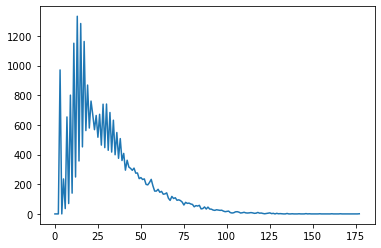

In [68]:
sentences = re.findall("[A-Z](?:\w*[,;]? )*\w*[\.!\?]", text)
lengths = [len(re.findall("\w*", sentence)) for sentence in sentences]
buckets = [0] * (max(lengths) + 1)
for length in lengths:
    buckets[length] += 1

from matplotlib import pyplot as plt
plt.plot(buckets)

Czy to poprawna metoda?

## Profilowanie kodu

### Problem:

Często bardzo mała część kodu odpowiada za znaczną część czasu wykonania. W jaki sposób możemy zmierzyć czas i wydajność kodu? Jak powinniśmy porównywać wydajność?

### Przykładowe biblioteki do profilowania kodu

Odpowiedź [asystenta OpenAI](https://chat.openai.com/chat) na pytanie `what method of code profiling would you recommend for Python?`.

There are several methods of code profiling that can be used with Python, and the best method to use will depend on your specific goals and needs. Some common methods of code profiling in Python include:

 * The [timeit](https://docs.python.org/3/library/timeit.html) module, which can be used to measure the execution time of small pieces of code
 * The [cProfile](https://docs.python.org/3/library/profile.html#module-cProfile) module, which provides a detailed breakdown of the execution time of a program
 * The [line_profiler](https://github.com/pyutils/line_profiler) and [memory_profiler](https://github.com/pythonprofilers/memory_profiler) modules, which can be used to profile the execution time and memory usage of specific lines of code

Each of these methods has its own strengths and limitations, and the best method to use will depend on the specific goals and needs of your project. Here is some more information about each of these methods:

 * The `timeit` module is a simple and easy-to-use method of profiling the execution time of small pieces of code. It provides a `timeit.timeit()` function that can be used to measure the time it takes for a given piece of code to run a specified number of times. This method is best suited for measuring the execution time of small, isolated pieces of code.

 * The `cProfile` module provides a more detailed and comprehensive view of the execution time of a Python program. It provides a `cProfile.run()` function that can be used to profile a Python program and generate a report that includes information about the execution time of each function in the program. This method is best suited for profiling larger, more complex programs and understanding the performance characteristics of different parts of the code.

 * The `line_profiler` and `memory_profiler` modules provide more specialized methods of profiling the execution time and memory usage of specific lines of code. These modules can be used to profile a Python program and generate a report that includes information about the execution time and memory usage of individual lines of code. This method is best suited for identifying and optimizing the performance of specific parts of a program.

### timeit

In [69]:
import timeit

setup = "from math import sqrt"

code = '''
def func():
    return [sqrt(x) for x in range(1000000000000000000000)]
'''

print(timeit.timeit(stmt=code, setup=setup, number=100))

8.500000006961272e-06


Czemu powyższy kod działa tak szybko?

In [70]:
setup = "from math import sqrt"

code = '''
[sqrt(x) for x in range(10000)]
'''

print(timeit.timeit(stmt=code, setup=setup, number=1000))

1.0405178000000035


Po wykonaniu kodu z `setup` `timeit.timeit` wywołuje kod wprowadzony w `stmt` `number` powtórzeń.

Analogicznie możemy wykonać własnoręcznie pobierając aktualny czas z `timeit.default_timer`.

In [71]:
from math import sqrt

start = timeit.default_timer()
for i in range(1000000):
    [sqrt(x) for x in range(100)]
print(timeit.default_timer() - start)

10.186874000000017


In [72]:
%timeit [sqrt(x) for x in range(10000)]

998 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### cProfile

Kod wygenerowany przez [asystenta OpenAI](https://chat.openai.com/chat)

In [73]:
# This code is an example of how to use the re package in Python.
# The code was provided by Assistant, a large language model trained by OpenAI.

import cProfile

def add_lists(a, b):
    c = []
    for i in range(len(a)):
        c.append(a[i] + b[i])
    return c

def main():
    a = [1, 2, 3, 4, 5]
    b = [6, 7, 8, 9, 10]
    c = add_lists(a, b)

# Profile the execution of the main() function
cProfile.run('main()')


         11 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 157748990.py:12(main)
        1    0.000    0.000    0.000    0.000 157748990.py:6(add_lists)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        5    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




### Graficzna reprezentacja wydajności

Do wyświetlania wykresów wykorzystujemy bibliotekę [matplotlib](https://matplotlib.org/).

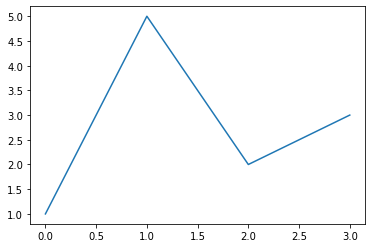

In [74]:
from matplotlib import pyplot as plt

plt.plot([1, 5, 2, 3])

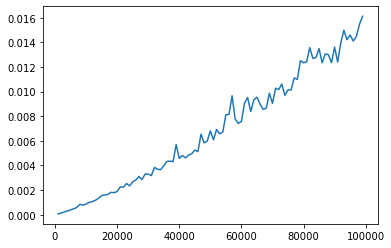

In [75]:
from random import random
from timeit import default_timer
N = 1000
times = []
ns = range(N, N * 100, N)
for n in ns:
    l = [random() for _ in range(n)]
    start = default_timer()
    l.sort()
    times.append(default_timer() - start)

plt.plot(list(ns), times)


## Wielowątkowość

### Problem:

Czas wykonania kodu może być ograniczony przez trzy czynniki: przetwarzanie danych, pobieranie danych oraz zewnętrzne systemy. Jeżeli jest to kwestia zewnętrznych systemów, to nasz program jest nieaktywny. Możemy w tym czasie wykonywać inne zadania. W jaki sposób możemy uruchomić zadanie w czasie, gdy kod czeka na otrzymanie wyniku z innego? W jaki sposób możemy wykonać kilka zadań w tym samym czasie? W jaki sposób możemy podzielić wykonanie zadania na kilka równoległych?

### Wątek

Program jest [procesem](https://en.wikipedia.org/wiki/Process_(computing)) z ewentualnym zestawem podprocesów. Każdy proces posiada swój zarezerwowany obszar pamięci oraz swój proces-rodzica, który nim zarządza. Tworzenie oddzielnych procesów jest kosztowne, dla małych, równoległych operacji możemy zamiast tego wykorzystać tak zwane [wątki](https://en.wikipedia.org/wiki/Thread_(computing)). Są to lekkie, równolegle wykonujące się zestawy operacji, które korzystają z tej samej przestrzeni pamięci.

Do tworzenia i zarządzania wątkami w Pythonie korzystamy z biblioteki [threading](https://docs.python.org/3/library/threading.html).

#### [threading.start](https://docs.python.org/3/library/threading.html#threading.Thread.start)

In [76]:
import threading
from time import sleep
from random import random

def countTo10():
    for i in range(10):
        sleep(random() * 0.1)
        print(i, end='')

t1 = threading.Thread(target=countTo10)
t2 = threading.Thread(target=countTo10)
t1.start()
t2.start()
print("Am I finished?")

Am I finished?


#### [threading.join](https://docs.python.org/3/library/threading.html#threading.Thread.join)

In [77]:
import threading
from time import sleep
from random import random

def countTo10():
    for i in range(10):
        sleep(random() * 1)
        print(i, end=' ')

def sleep6s():
    print("I start my sleep")
    sleep(3)
    print("I go asleep again")
    sleep(3)

t1 = threading.Thread(target=countTo10)
t2 = threading.Thread(target=sleep6s)
t1.start()
t2.start()
print("Am I finished?")
t1.join()
t2.join()

0011I start my sleep
Am I finished?
22334450 656781 97892 3 4 5 6 7 I go asleep again
8 9 

#### Wątki z argumentami

In [78]:
import threading
from time import sleep
from random import random

def countToN(n):
    for i in range(n):
        sleep(random() * 0.1)
        print(i, end='')

t1 = threading.Thread(target=countToN, args=(5,))
t2 = threading.Thread(target=countToN, args=(10,))
t1.start()
t2.start()
print("Am I finished?")
t1.join()
t2.join()

Am I finished?
010231423456789

In [79]:
import threading
from time import sleep
from random import random

def greet(k, n):
    for i in range(n):
        sleep(random() * 0.1)
        print(f"{k}: Hello {i}th time")

t1 = threading.Thread(target=greet, args=(0, 50))
t2 = threading.Thread(target=greet, args=(1, 50))
t1.start()
t2.start()
print("Am I finished?")
t1.join()
t2.join()

Am I finished?
1: Hello 0th time
1: Hello 1th time
0: Hello 0th time
0: Hello 1th time
1: Hello 2th time
0: Hello 2th time
1: Hello 3th time
0: Hello 3th time
1: Hello 4th time
0: Hello 4th time
1: Hello 5th time0: Hello 5th time

0: Hello 6th time
1: Hello 6th time
0: Hello 7th time
1: Hello 7th time
0: Hello 8th time
0: Hello 9th time1: Hello 8th time

1: Hello 9th time
0: Hello 10th time
0: Hello 11th time
1: Hello 10th time
1: Hello 11th time
1: Hello 12th time0: Hello 12th time

0: Hello 13th time
1: Hello 13th time
0: Hello 14th time1: Hello 14th time

0: Hello 15th time
1: Hello 15th time
1: Hello 16th time0: Hello 16th time

0: Hello 17th time
1: Hello 17th time
1: Hello 18th time
0: Hello 18th time
1: Hello 19th time
1: Hello 20th time
0: Hello 19th time
1: Hello 21th time
0: Hello 20th time
1: Hello 22th time
0: Hello 21th time
1: Hello 23th time
0: Hello 22th time
1: Hello 24th time
0: Hello 23th time
0: Hello 24th time
1: Hello 25th time
1: Hello 26th time
0: Hello 25th tim

#### [Wyścig](https://en.wikipedia.org/wiki/Race_condition)

In [80]:
import threading
from time import sleep
from random import random

sharedCounter = 0
def add1000000():
    global sharedCounter
    for i in range(1000000):
        sharedCounter += 1

t1 = threading.Thread(target=add1000000)
t2 = threading.Thread(target=add1000000)
t1.start()
t2.start()
t1.join()
t2.join()
print(sharedCounter)

1348264


#### [Lock](https://docs.python.org/3/library/threading.html#threading.Lock)

In [81]:
import threading
from time import sleep
from random import random

lock = threading.Lock()
sharedCounter = 0

def add1():
    global sharedCounter
    lock.acquire()
    sharedCounter += 1
    lock.release()

def add1000000():
    global sharedCounter
    for i in range(1000000):
        add1()

t1 = threading.Thread(target=add1000000)
t2 = threading.Thread(target=add1000000)
t1.start()
t2.start()
t1.join()
t2.join()
print(sharedCounter)

2000000


#### Zwracanie wartości przez wątek

In [82]:
import threading
from random import random

N = 10000
M = 100
results = [None] * M


arr = [[random() for _ in range(N)] for _ in range(N)]

def calculateSum(arr, n, k, results):
    results[n] = sum([sum(row) for row in arr[n * k: n * k + k]])

threads = [threading.Thread(target=calculateSum, args=(arr, i, N // M, results)) for i in range(M)]
for thread in threads:
    thread.start()

for thread in threads:
    thread.join()

sum(results)

49996822.698600516

### [Global Interpreter Lock](https://en.wikipedia.org/wiki/Global_interpreter_lock)

Zmierzmy czas wykonania tego wywołania dla wielu wątków.

In [83]:
import threading
from random import random

N = 10000
M = 100
results = [None] * M


arr = [[random() for _ in range(N)] for _ in range(N)]

def calculateSum(arr, n, k, results):
    results[n] = sum([sum(row) for row in arr[n * k: n * k + k]])


In [84]:
%%timeit
threads = [threading.Thread(target=calculateSum, args=[arr, i, N // M, results]) for i in range(M)]

for thread in threads:
    thread.start()

for thread in threads:
    thread.join()

522 ms ± 4.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Zmierzmy również czas wykonania dla jednego wątku.

In [85]:
result = [None]

%timeit calculateSum(arr, 0, N, result)

474 ms ± 6.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Czemu te czasy są podobne? Python nie pozwala na rzeczywistą wielowątkowość zezwalając na działanie wyłącznie jednego wątku na raz. Zaimplementowane jest z pomocą tak zwanego Globalnej Blokady Interpretatora. Jeżeli jeden wątek korzysta z danych i coś na nich wykonuje wszystkie pozostałe czekają na zwolnienie tych zasobów.

### Multiprocessing

Zamiast tworzyć wątki w ramach naszego procesu możemy stworzyć oddzielny podproces. Procesy posiadają własną przestrzeń pamięci i działają niezależnie od siebie. Nie współdzielą domyślnie żadnych zmiennych i nie ma potrzeby tworzenia blokad na obiektach jak w przypadku wątków. Zaletą jest możliwość wykonywania ich równolegle na kilku jądrach procesora, wadą zaś, droga procedura tworzenia oraz droga procedura komunikowania się pomiędzy procesami.

Biblioteka [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) udostępnia nam funkcjonalności takie jak:

 * [Process](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Process) - klasa pojedynczego procesu, analogiczna do `Thread`.
 * [Pool](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool) - klasa zarządzająca wieloma procesami i rozdzielająca zadania pomiędzy nie. Działa dla funkcjonalności iterowania po listach.
 * [Manager](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Manager) - pozwala na współdzielenie obiektów pomiędzy procesami.
